# **Experiment II**

In this experiment, we apply these layers:


1.   Dense with 1024 Fully Connected layers
2.   With Dropout layer (rate=0.2)
3.   BatchNormalization

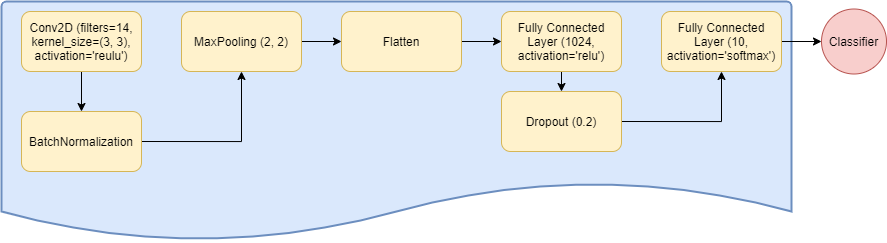


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

print(train_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
train_images = tf.reshape(train_images, shape=(60000, 28, 28, 1))
test_images = tf.reshape(test_images, shape=(10000, 28, 28, 1))

train_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(train_images))
test_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_images))

print('Train images shape: ', train_images.shape)
print('Test images shape: ', test_images.shape)

Train images shape:  (60000, 28, 28, 3)
Test images shape:  (10000, 28, 28, 3)


In [ ]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# Initialize the He initializer
initializer = tf.keras.initializers.HeNormal()

model = Sequential()
model.add(Input(shape=(28, 28, 3)))
model.add(Conv2D(14, (3, 3) , activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 14)        392       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 14)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 14)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2366)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2423808   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history_data = model.fit(x=train_images, 
                         y=train_labels,
                         epochs=300,
                         verbose=1)

Epoch 1/300
1875/1875 [==============================] - 37s 3ms/step - loss: 0.3187 - accuracy: 0.9223
Epoch 2/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9846
Epoch 3/300
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9902
Epoch 4/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 5/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 6/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9948
Epoch 7/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 8/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 9/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 10/300
1875/1875 [==============================] - 5s 3ms/step - 

In [ ]:
model.save('/content/gdrive/MyDrive/Tradition_FE_Extraction vs CNN/Models/EXP2-MNIST-CNN_Approach_v1.h5')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def eval_model(model, test_images, test_labels):
  predictions = np.argmax(model.predict(test_images), axis=1)
  print(str(accuracy_score(y_pred=predictions, y_true=test_labels)))
  print(str(recall_score(y_pred=predictions, y_true=test_labels, average='macro')))

In [ ]:
eval_model(model, test_images, test_labels)

0.9883
0.9881986156901543


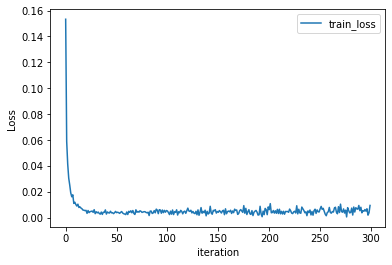

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

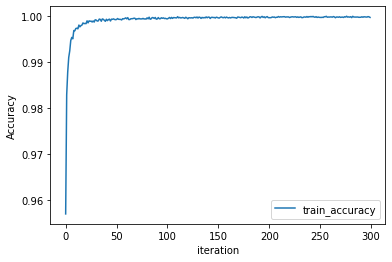

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()